ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

In [57]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [58]:
# Load Dataset

df = pd.read_csv("customer_purchase_dataset.csv")

# Display first 5 rows
df.head()

,CustomerID,Age,Gender,Location,ProductCategory,PurchaseAmount,PaymentMethod,PurchaseDate,DeviceUsed,ReturningCustomer
0,e555349c-0446-41fc-a343-188e4cbc226a,38,Male,Germany,Books,1969.04,PayPal,2024-08-29,Desktop,Yes
1,042dd0c7-b4ab-42f5-bd1c-04795a375acd,70,Female,Canada,Sports,464.76,Cash,2025-03-23,Mobile,No
2,300b7393-3eff-4268-91d5-97c97fc02a36,70,Male,India,Books,1724.29,PayPal,2024-04-05,Mobile,No
3,a6dc41cf-8117-4df3-aa63-fe9729fb8143,41,Male,Australia,Sports,58.10,Debit Card,2025-12-17,Mobile,No
4,d6369cb1-736d-409e-8276-bd5101928553,24,Female,Canada,Clothing,1571.80,Credit Card,2024-11-10,Desktop,No


### Check Missing Values

In [59]:
# Check all values
print(df.isna())

     CustomerID    Age  Gender  Location  ProductCategory  PurchaseAmount  \
0         False  False   False     False            False           False   
1         False  False   False     False            False           False   
2         False  False   False     False            False           False   
3         False  False   False     False            False           False   
4         False  False   False     False            False           False   
..          ...    ...     ...       ...              ...             ...   
495       False  False   False     False            False           False   
496       False  False   False     False            False           False   
497       False  False   False     False            False           False   
498       False  False   False     False            False           False   
499       False  False   False     False            False           False   

     PaymentMethod  PurchaseDate  DeviceUsed  ReturningCustomer  
0        

In [60]:
print(df.isna().sum())

CustomerID           0
Age                  0
Gender               0
Location             0
ProductCategory      0
PurchaseAmount       0
PaymentMethod        0
PurchaseDate         0
DeviceUsed           0
ReturningCustomer    0
dtype: int64


### Check Duplicate Rows

In [61]:
# Checking duplicate rows
df.duplicated()[df.duplicated()==True]

,0


### No. of Rows and Columns

In [62]:
# Finding number of rows and columns

print("Shape (rows, columns): ", df.shape, "")

print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Shape (rows, columns):  (500, 10) 
Number of rows:  500
Number of columns:  10


### Data Type of Columns

In [63]:
# Viewing the data types of columns
df.dtypes

,0
CustomerID,object
Age,int64
Gender,object
Location,object
ProductCategory,object
PurchaseAmount,float64
PaymentMethod,object
PurchaseDate,object
DeviceUsed,object
ReturningCustomer,object


In [64]:
# Convert PurchaseDate to datetime
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])

df.dtypes

,0
CustomerID,object
Age,int64
Gender,object
Location,object
ProductCategory,object
PurchaseAmount,float64
PaymentMethod,object
PurchaseDate,datetime64[ns]
DeviceUsed,object
ReturningCustomer,object


### Descriptive Summary Statistics

In [65]:
# Statistical summary
df.describe(include="all")

,CustomerID,Age,Gender,Location,ProductCategory,PurchaseAmount,PaymentMethod,PurchaseDate,DeviceUsed,ReturningCustomer
count,500,500.000000,500,500,500,500.000000,500,500,500,500
unique,500,NaN,2,6,5,NaN,4,NaN,3,2
top,b7fbc77c-d649-4f94-bff8-e84912b3c18d,NaN,Male,USA,Home,NaN,Debit Card,NaN,Mobile,No
freq,1,NaN,253,91,107,NaN,133,NaN,172,257
mean,NaN,42.804000,NaN,NaN,NaN,1042.292280,NaN,2024-12-16 04:30:43.200000,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,53.550000,NaN,2024-01-01 00:00:00,NaN,NaN
25%,NaN,29.000000,NaN,NaN,NaN,560.962500,NaN,2024-05-24 18:00:00,NaN,NaN
50%,NaN,42.000000,NaN,NaN,NaN,1067.625000,NaN,2024-12-17 00:00:00,NaN,NaN
75%,NaN,56.000000,NaN,NaN,NaN,1495.565000,NaN,2025-06-21 12:00:00,NaN,NaN
max,NaN,70.000000,NaN,NaN,NaN,1996.780000,NaN,2025-12-31 00:00:00,NaN,NaN


### Univariate Analysis

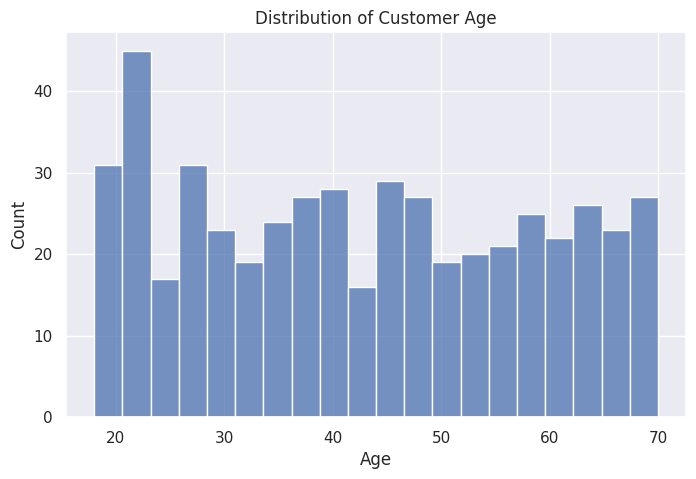

In [66]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20)
plt.title("Distribution of Customer Age")
plt.show()

- Shows how customer ages are distributed
- Helps identify the dominant age group of customers

### Distribution of Purchase Amount

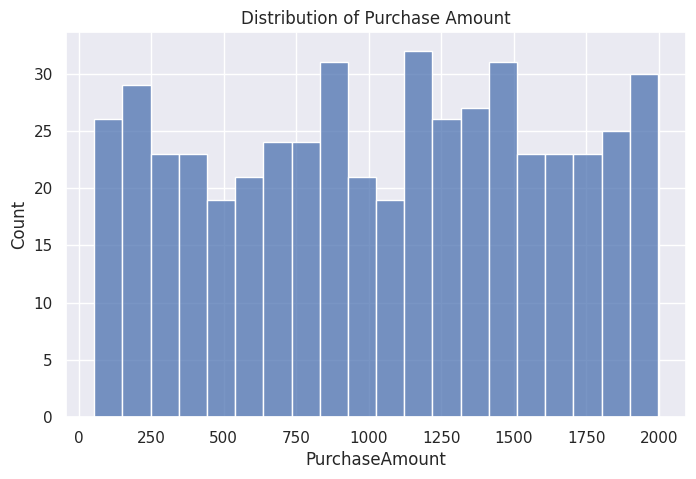

In [67]:
plt.figure(figsize=(8,5))
sns.histplot(df["PurchaseAmount"], bins=20)
plt.title("Distribution of Purchase Amount")
plt.show()

## Bivariate Analysis

### Purchase Amount by Location

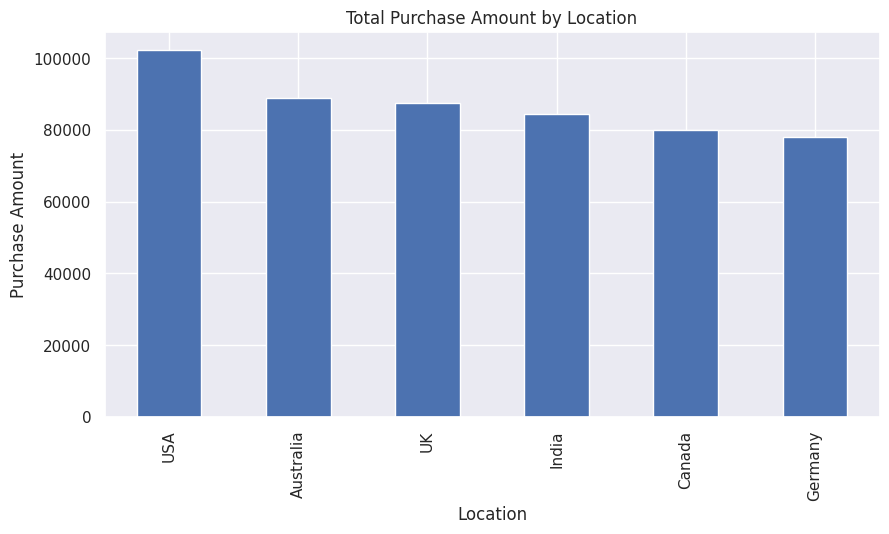

,PurchaseAmount
Location,
USA,102224.90
Australia,89021.26
UK,87460.16
India,84460.67
Canada,80034.09
Germany,77945.06


In [68]:
location_revenue = df.groupby("Location")["PurchaseAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
location_revenue.plot(kind="bar")
plt.title("Total Purchase Amount by Location")
plt.ylabel("Purchase Amount")
plt.show()

location_revenue

### Purchase Amount by Product Category

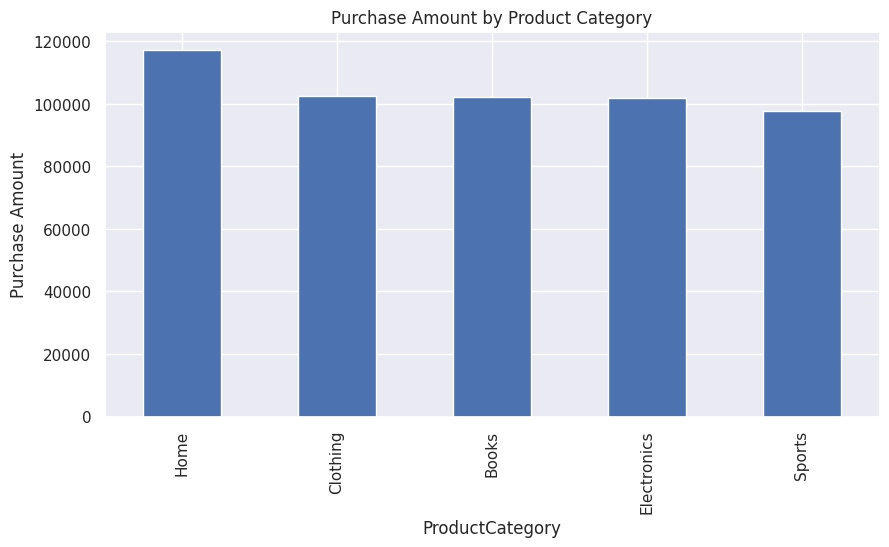

,PurchaseAmount
ProductCategory,
Home,117210.40
Clothing,102376.79
Books,102059.97
Electronics,101900.53
Sports,97598.45


In [69]:
product_revenue = df.groupby("ProductCategory")["PurchaseAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind="bar")
plt.title("Purchase Amount by Product Category")
plt.ylabel("Purchase Amount")
plt.show()

product_revenue

### Purchase Amount by Payment Method

In [70]:
payment_revenue = df.groupby("PaymentMethod")["PurchaseAmount"].sum().sort_values(ascending=False)

payment_revenue.head(10)

,PurchaseAmount
PaymentMethod,
Debit Card,146306.10
Credit Card,139836.19
PayPal,122003.34
Cash,113000.51


### Age vs Purchase Amount Relationship

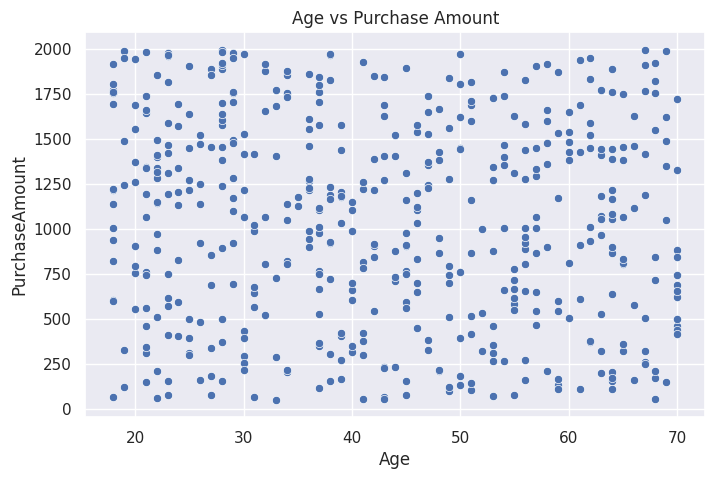

In [71]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Age", y="PurchaseAmount", data=df)
plt.title("Age vs Purchase Amount")
plt.show()

### Correlation Matrix

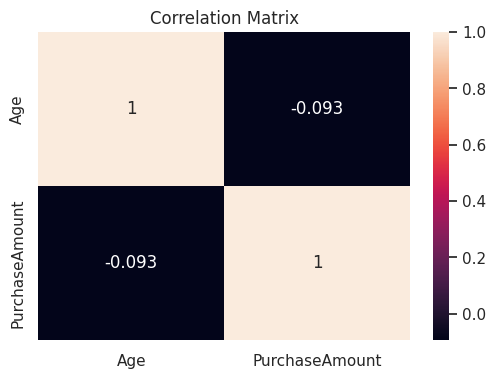

In [72]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Age", "PurchaseAmount"]].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Purchase Trend

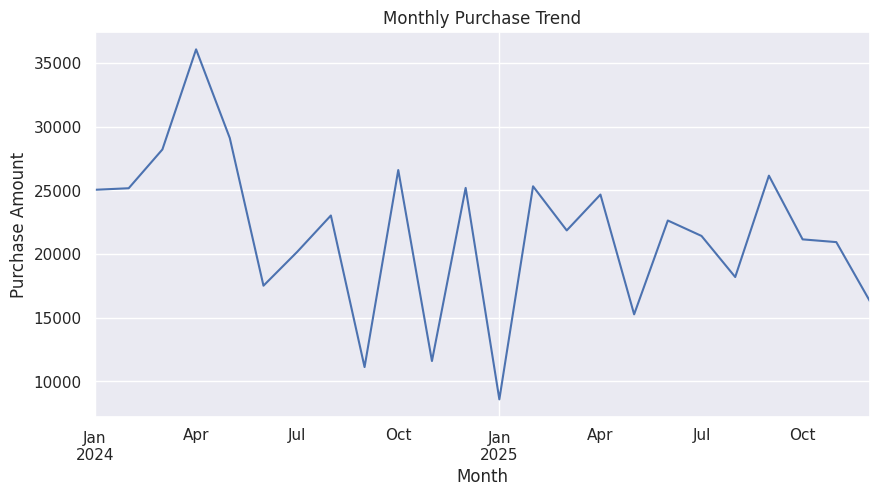

In [73]:
df["Month"] = df["PurchaseDate"].dt.to_period("M")

monthly_revenue = df.groupby("Month")["PurchaseAmount"].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Purchase Trend")
plt.ylabel("Purchase Amount")
plt.show()